In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
# Pytorch package
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Tqdm progress bar
from tqdm import tqdm

from torch.nn import Transformer
from torch.utils.data import TensorDataset, DataLoader
from torchmetrics.regression import MeanAbsolutePercentageError

In [16]:
df = pd.read_csv("cgm_data.csv")
for column in df.columns:
    df[column] = df[column].astype(float)
df.rename({0:"ID"}, axis=1)
df = df.drop("ptid", axis=1)
df = df.iloc[:-1 , :]
df

,0 days 00:00:00,0 days 00:15:00,0 days 00:30:00,0 days 00:45:00,0 days 01:00:00,0 days 01:15:00,0 days 01:30:00,0 days 01:45:00,0 days 02:00:00,0 days 02:15:00,...,4 days 21:30:00,4 days 21:45:00,4 days 22:00:00,4 days 22:15:00,4 days 22:30:00,4 days 22:45:00,4 days 23:00:00,4 days 23:15:00,4 days 23:30:00,4 days 23:45:00
0,138.6,120.6,106.2,97.2,88.2,75.6,64.8,59.4,59.4,68.4,...,104.4,97.2,93.6,90.0,93.6,104.4,108.0,106.2,104.4,108.0
1,102.6,97.2,95.4,91.8,86.4,82.8,86.4,90.0,88.2,84.6,...,145.8,151.2,149.4,145.8,145.8,142.2,136.8,127.8,126.0,127.8
2,151.2,145.8,142.2,142.2,142.2,149.4,156.6,151.2,145.8,142.2,...,151.2,149.4,154.8,172.8,190.8,203.4,212.4,217.8,219.6,208.8
3,257.4,246.6,235.8,225.0,228.6,255.6,289.8,311.4,313.2,311.4,...,226.8,207.0,198.0,190.8,169.2,145.8,124.2,102.6,84.6,70.2
4,264.6,262.8,248.4,241.2,241.2,237.6,232.2,232.2,235.8,235.8,...,171.0,174.6,174.6,178.2,180.0,181.8,181.8,181.8,185.4,190.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,194.4,212.4,210.6,180.0,149.4,133.2,122.4,109.8,109.8,124.2,...,192.6,183.6,176.4,169.2,156.6,131.4,115.2,113.4,113.4,100.8
92,86.4,73.8,63.0,55.8,46.8,43.2,45.0,43.2,43.2,46.8,...,264.6,286.2,298.8,291.6,279.0,264.6,252.0,244.8,232.2,219.6
93,147.6,140.4,136.8,133.2,131.4,122.4,111.6,106.2,97.2,82.8,...,201.6,190.8,181.8,165.6,151.2,149.4,147.6,144.0,142.2,131.4
94,136.8,147.6,160.2,176.4,198.0,205.2,205.2,219.6,235.8,244.8,...,194.4,199.8,219.6,235.8,230.4,214.2,205.2,194.4,185.4,180.0


In [17]:
df.shape

(96, 480)

In [18]:
df.head()

,0 days 00:00:00,0 days 00:15:00,0 days 00:30:00,0 days 00:45:00,0 days 01:00:00,0 days 01:15:00,0 days 01:30:00,0 days 01:45:00,0 days 02:00:00,0 days 02:15:00,...,4 days 21:30:00,4 days 21:45:00,4 days 22:00:00,4 days 22:15:00,4 days 22:30:00,4 days 22:45:00,4 days 23:00:00,4 days 23:15:00,4 days 23:30:00,4 days 23:45:00
0,138.6,120.6,106.2,97.2,88.2,75.6,64.8,59.4,59.4,68.4,...,104.4,97.2,93.6,90.0,93.6,104.4,108.0,106.2,104.4,108.0
1,102.6,97.2,95.4,91.8,86.4,82.8,86.4,90.0,88.2,84.6,...,145.8,151.2,149.4,145.8,145.8,142.2,136.8,127.8,126.0,127.8
2,151.2,145.8,142.2,142.2,142.2,149.4,156.6,151.2,145.8,142.2,...,151.2,149.4,154.8,172.8,190.8,203.4,212.4,217.8,219.6,208.8
3,257.4,246.6,235.8,225.0,228.6,255.6,289.8,311.4,313.2,311.4,...,226.8,207.0,198.0,190.8,169.2,145.8,124.2,102.6,84.6,70.2
4,264.6,262.8,248.4,241.2,241.2,237.6,232.2,232.2,235.8,235.8,...,171.0,174.6,174.6,178.2,180.0,181.8,181.8,181.8,185.4,190.8


In [19]:
# Check device availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("You are using device: %s" % device)

You are using device: cpu


In [67]:
# Define your hyperparameters
N_EPOCHS = 5
BATCH_SIZE = 1
FEATURE_DIM = 32
NHEAD = 1
NHID = 64
NLAYERS = 2
DROPOUT = 0.2
LR = 0.01
training_patients = 90
prediction_horizon = 1

In [100]:
def train_test_split(df, training_patients, prediction_horizon, device):
    train_input = torch.from_numpy(df.iloc[:training_patients,:-prediction_horizon].values).float().to(device)
    train_target = torch.from_numpy(df.iloc[:training_patients, :-prediction_horizon].values).float().to(device)
    test_input = torch.from_numpy(df.iloc[training_patients:,:-prediction_horizon].values).float().to(device)
    test_target = torch.from_numpy(df.iloc[training_patients:, :-prediction_horizon].values).float().to(device)

    train_input = torch.unsqueeze(train_input, -1)
    train_target = torch.unsqueeze(train_target, -1)
    test_input = torch.unsqueeze(test_input, -1)
    test_target = torch.unsqueeze(test_target, -1)
    return train_input, train_target, test_input, test_target

In [101]:
class TransformerModel(nn.Module):
    def __init__(self, d_model, nhead, num_layers, dim_feedforward):
        super(TransformerModel, self).__init__()
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward), num_layers)
        self.linear = nn.Linear(d_model, 1)

    def forward(self, x):
        x = self.transformer_encoder(x)
        x = self.linear(x)
        return x

In [103]:
train_input, train_target, test_input, test_target = train_test_split(df,training_patients, prediction_horizon, device)
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

torch.Size([90, 479, 1])
torch.Size([90, 479, 1])
torch.Size([6, 479, 1])
torch.Size([6, 479, 1])


In [104]:
model = TransformerModel(d_model=1, nhead=NHEAD, num_layers=NLAYERS, dim_feedforward=2048).to(device)
criterion = MeanAbsolutePercentageError().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

In [105]:
train_losses = []
test_losses = []

model.train()
for epoch in range(N_EPOCHS):
    optimizer.zero_grad()

    output = model(train_input)
    loss = criterion(output, train_target)
    train_losses.append(loss.item())
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Training Loss {loss.item()}')

    # Switch to evaluation mode
    model.eval()
    with torch.no_grad():
        test_output = model(test_input)
        test_loss = criterion(test_output, test_target)
        test_losses.append(test_loss.item())
        print(f'Test Loss {test_loss.item()}')

# Calculate metrics here based on your needs, for example MAPE
mape = MeanAbsolutePercentageError().to(device)
mape_score = mape(test_output, test_target)
print(f'Test MAPE {mape_score.item()}')

Epoch 0, Training Loss 0.9937000870704651
Test Loss 0.993949294090271
Test Loss 0.9938430786132812
Test Loss 0.9937354922294617
Test Loss 0.9936265349388123
Test Loss 0.9935160279273987
Test MAPE 0.9935160279273987


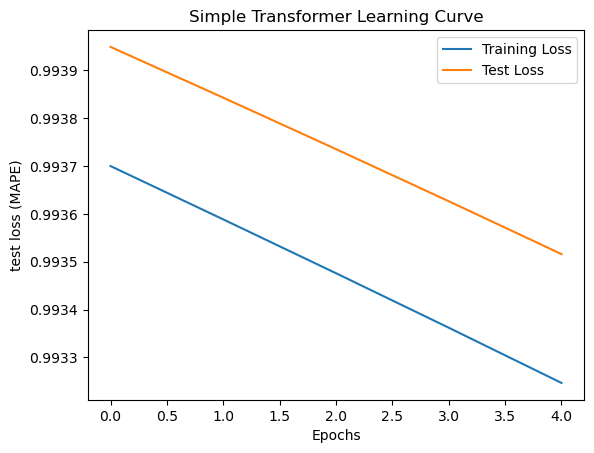

0.9935160279273987


In [106]:
#Training Curve
plt.figure()
plt.plot(range(N_EPOCHS), train_losses, label = "Training Loss")
plt.plot(range(N_EPOCHS), test_losses, label = "Test Loss")
plt.ylabel("test loss (MAPE)")
plt.xlabel("Epochs")
plt.title("Simple Transformer Learning Curve")
plt.legend()
plt.show()
print(test_losses[-1])

torch.Size([6, 479, 1])
torch.Size([6, 479, 1])


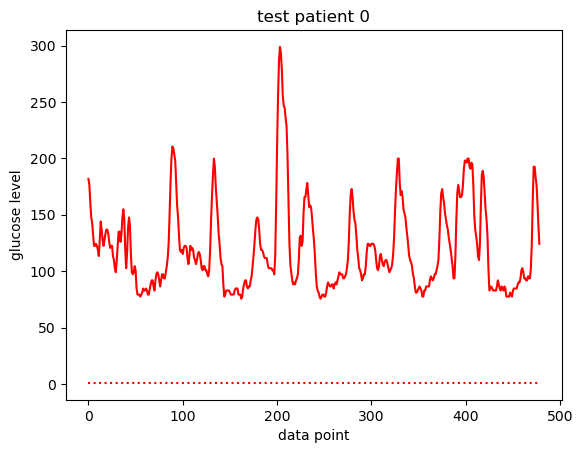

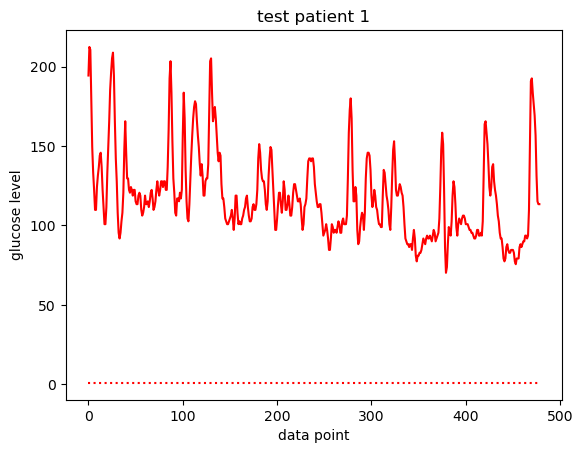

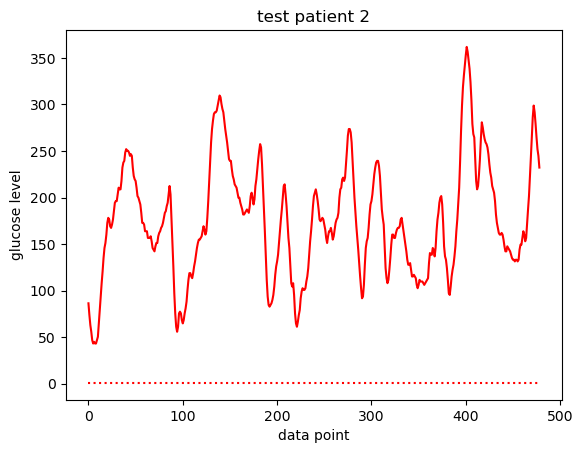

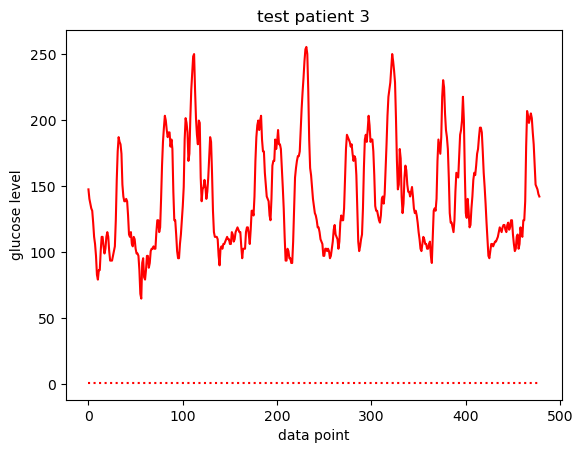

In [109]:
def draw(true, pred, index, future, color):
    true = true.to('cpu')
    pred = pred.to("cpu")
    plt.figure()
    plt.title(f"test patient {index}")
    plt.xlabel("data point")
    plt.ylabel("glucose level")
    plt.xticks()
    plt.yticks()
    n = train_input.shape[1]
    plt.plot(np.arange(n), true[index,:], color)
    plt.plot(np.arange(n+future), pred[index,:], color + ":")
    plt.show()


print(test_target.shape)
print(test_output.shape)

draw(test_target, test_output,0,0,'r')
draw(test_target, test_output,1,0,'r')
draw(test_target, test_output,2,0,'r')
draw(test_target, test_output,3,0,'r')

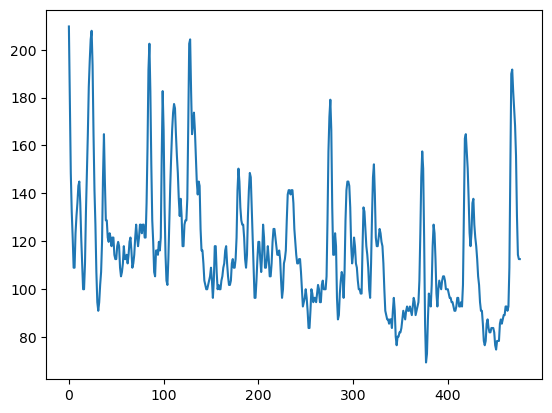

In [110]:
plt.figure()
plt.plot(range(len(test_target[1,2:])),test_target[1,2:].to('cpu') - test_output[1,2:].to('cpu'))
plt.title("What is this")
plt.show()

Graph 2 Variable Time Horizon

In [111]:
prediction_horizons = range(1,9)

final_test_losses = []


for prediction_horizon in prediction_horizons:
    train_input, train_target, test_input, test_target = train_test_split(df,training_patients, prediction_horizon, device)
    model = TransformerModel(d_model=1, nhead=NHEAD, num_layers=NLAYERS, dim_feedforward=2048).to(device)
    criterion = MeanAbsolutePercentageError().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)

    train_losses = []
    test_losses = []

    model.train()
    for epoch in range(N_EPOCHS):
        optimizer.zero_grad()

        output = model(train_input)
        loss = criterion(output, train_target)
        train_losses.append(loss.item())
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Training Loss {loss.item()}')

        # Switch to evaluation mode
        model.eval()
        with torch.no_grad():
            test_output = model(test_input)
            test_loss = criterion(test_output, test_target)
            test_losses.append(test_loss.item())
            print(f'Test Loss {test_loss.item()}')

    # Calculate metrics here based on your needs, for example MAPE
    mape = MeanAbsolutePercentageError().to(device)
    mape_score = mape(test_output, test_target)
    print(f'Test MAPE {mape_score.item()}')

    final_test_losses.append(test_losses[-1])


Epoch 0, Training Loss 0.9931468963623047
Test Loss 0.9934198260307312
Test Loss 0.9933062791824341
Test Loss 0.9931911826133728
Test Loss 0.9930747151374817
Test Loss 0.9929568767547607
Test MAPE 0.9929568767547607
Epoch 0, Training Loss 1.0010563135147095
Test Loss 1.0008701086044312
Test Loss 1.0007423162460327
Test Loss 1.0006130933761597
Test Loss 1.000482439994812
Test Loss 1.0003503561019897
Test MAPE 1.0003503561019897
Epoch 0, Training Loss 0.9955624341964722
Test Loss 0.9957118630409241
Test Loss 0.9956113696098328
Test Loss 0.9955095648765564
Test Loss 0.9954062104225159
Test Loss 0.9953016042709351
Test MAPE 0.9953016042709351
Epoch 0, Training Loss 0.9964801669120789
Test Loss 0.9965329766273499
Test Loss 0.9963876605033875
Test Loss 0.99624103307724
Test Loss 0.9960929751396179
Test Loss 0.995943546295166
Test MAPE 0.995943546295166
Epoch 0, Training Loss 0.9984146356582642
Test Loss 0.9984130263328552
Test Loss 0.9983218312263489
Test Loss 0.9982295036315918
Test Loss 0.

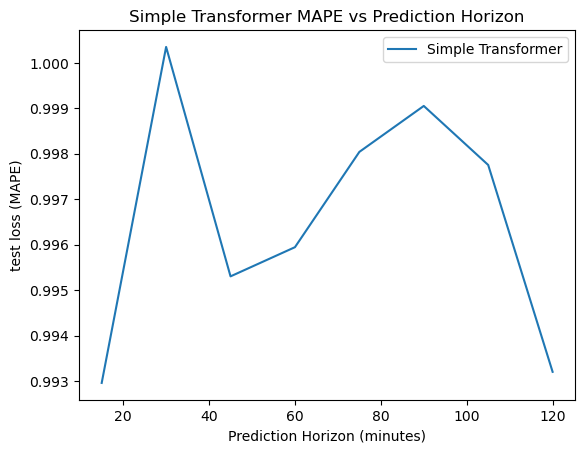

In [112]:
# Training Curve
plt.figure()
plt.plot([15 * x for x in prediction_horizons], final_test_losses, label = "Simple Transformer")
plt.ylabel("test loss (MAPE)")
plt.xlabel("Prediction Horizon (minutes)")
plt.title("Simple Transformer MAPE vs Prediction Horizon")
plt.legend()
plt.show()

Graph 3 Variable Training Patients

In [113]:
training_patients_sizes = [1,10,20,30,40,50,60,70,80,90]
prediction_horizon = 1

final_test_losses = []

for training_patients in training_patients_sizes:
    train_input, train_target, test_input, test_target = train_test_split(df,training_patients, prediction_horizon, device)
    model = TransformerModel(d_model=1, nhead=NHEAD, num_layers=NLAYERS, dim_feedforward=2048).to(device)
    criterion = MeanAbsolutePercentageError().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)

    train_losses = []
    test_losses = []

    model.train()
    for epoch in range(N_EPOCHS):
        optimizer.zero_grad()

        output = model(train_input)
        loss = criterion(output, train_target)
        train_losses.append(loss.item())
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Training Loss {loss.item()}')

        # Switch to evaluation mode
        model.eval()
        with torch.no_grad():
            test_output = model(test_input)
            test_loss = criterion(test_output, test_target)
            test_losses.append(test_loss.item())
            print(f'Test Loss {test_loss.item()}')

    # Calculate metrics here based on your needs, for example MAPE
    mape = MeanAbsolutePercentageError().to(device)
    mape_score = mape(test_output, test_target)
    print(f'Test MAPE {mape_score.item()}')

    final_test_losses.append(test_losses[-1])

Epoch 0, Training Loss 1.0005230903625488
Test Loss 1.0003401041030884
Test Loss 1.0002453327178955
Test Loss 1.0001490116119385
Test Loss 1.000051498413086
Test Loss 0.9999522566795349
Test MAPE 0.9999522566795349
Epoch 0, Training Loss 1.000426173210144
Test Loss 1.000372290611267
Test Loss 1.0002589225769043
Test Loss 1.0001440048217773
Test Loss 1.0000276565551758
Test Loss 0.9999099373817444
Test MAPE 0.9999099373817444
Epoch 0, Training Loss 0.9989972114562988
Test Loss 0.9987608790397644
Test Loss 0.9986459612846375
Test Loss 0.9985294938087463
Test Loss 0.9984117150306702
Test Loss 0.9982921481132507
Test MAPE 0.9982921481132507
Epoch 0, Training Loss 0.9948996305465698
Test Loss 0.994173526763916
Test Loss 0.9940784573554993
Test Loss 0.9939820170402527
Test Loss 0.9938840270042419
Test Loss 0.9937844276428223
Test MAPE 0.9937844276428223
Epoch 0, Training Loss 1.0029644966125488
Test Loss 1.0033177137374878
Test Loss 1.003218173980713
Test Loss 1.0031172037124634
Test Loss 1.

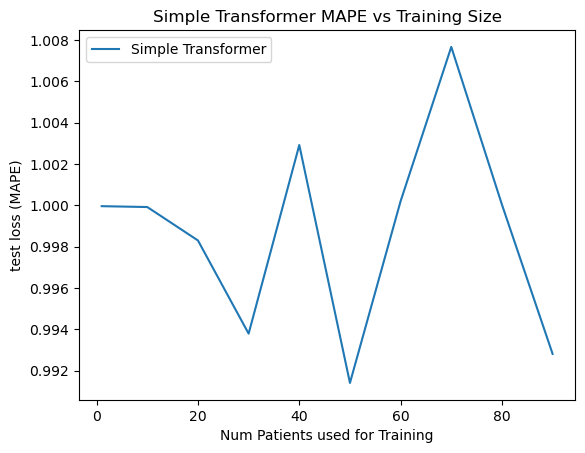

In [114]:
#Training Curve
plt.figure()
plt.plot(training_patients_sizes,final_test_losses, label = "Simple Transformer")
plt.ylabel("test loss (MAPE)")
plt.xlabel("Num Patients used for Training")
plt.title("Simple Transformer MAPE vs Training Size")
plt.legend()
plt.show()